* [네이버 오픈 API 목록 - INTRO](https://developers.naver.com/products/intro/plan/plan.md)
* [애플리케이션 - NAVER Developers](https://developers.naver.com/apps/#/list)

In [8]:
import os
import requests
import pandas as pd
import time
import logging
from tqdm import tqdm
from datetime import datetime
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 환경변수 로드
load_dotenv()

False

In [9]:
# 로거 설정
logger = setup_logging()
logger.info("프로그램 시작")

# 설정값 정의
CATEGORIES = [
    {"name": "패션의류", "param": ["50000000"]},
    {"name": "화장품/미용", "param": ["50000002"]},
    {"name": "디지털/가전", "param": ["50000003"]},
    {"name": "가구/인테리어", "param": ["50000004"]},
    {"name": "출산/육아", "param": ["50000005"]},
    {"name": "스포츠/레저", "param": ["50000006"]},
    {"name": "생활/건강", "param": ["50000007"]},
    {"name": "여가/생활편의", "param": ["50000008"]},
    {"name": "식품", "param": ["50000009"]},
    {"name": "도서", "param": ["50000010"]}
]

START_DATE = "2024-01-01"
END_DATE = "2024-12-15"
TIME_UNIT = "date"
DEVICES = ["pc", "mobile"]
GENDERS = ["f", "m"]
AGES = ["10", "20", "30", "40", "50", "60"]


# 환경변수에서 API 키 로드
CLIENT_ID = "uD_1kctG8tlAmJx1XoRX"
CLIENT_SECRET = "4PZh2CBqA1"
URL = "https://openapi.naver.com/v1/datalab/shopping/categories"

if not CLIENT_ID or not CLIENT_SECRET:
    logger.error("CLIENT_ID 또는 CLIENT_SECRET이 설정되지 않았습니다. .env 파일을 확인하세요.")
    exit(1)


try:
    # 데이터 수집
    logger.info("데이터 수집 시작")
    df = fetch_data(
        CLIENT_ID, CLIENT_SECRET, URL, CATEGORIES,
        START_DATE, END_DATE, TIME_UNIT,
        DEVICES, GENDERS, AGES,
        logger
    )
    
    if not df.empty:
        # 원본 데이터 저장
        df.to_csv("raw_shopping_data.csv", index=False)
        logger.info("원본 데이터 저장 완료")
        
        # 전처리된 데이터 저장
        df.to_csv("processed_shopping_data.csv", index=False)
        logger.info("전처리된 데이터 저장 완료")
        
    else:
        logger.error("수집된 데이터가 없습니다.")
        
except Exception as e:
    logger.error(f"프로그램 실행 중 오류 발생: {str(e)}")

finally:
    logger.info("프로그램 종료")

2024-12-21 15:54:59,962 - INFO - 프로그램 시작
2024-12-21 15:54:59,963 - ERROR - CLIENT_ID 또는 CLIENT_SECRET이 설정되지 않았습니다. .env 파일을 확인하세요.
2024-12-21 15:54:59,964 - INFO - 데이터 수집 시작
데이터 수집 진행률:   0%|          | 0/240 [00:00<?, ?it/s]2024-12-21 15:55:00,012 - INFO - 수집 중: pc-f-10-패션의류
2024-12-21 15:55:00,163 - INFO - 성공: 패션의류 데이터 수집 완료
데이터 수집 진행률:   0%|          | 1/240 [00:00<00:36,  6.59it/s]2024-12-21 15:55:00,268 - INFO - 수집 중: pc-f-10-화장품/미용
2024-12-21 15:55:00,344 - INFO - 성공: 화장품/미용 데이터 수집 완료
데이터 수집 진행률:   1%|          | 2/240 [00:00<00:40,  5.92it/s]2024-12-21 15:55:00,450 - INFO - 수집 중: pc-f-10-디지털/가전
2024-12-21 15:55:00,517 - INFO - 성공: 디지털/가전 데이터 수집 완료
데이터 수집 진행률:   1%|▏         | 3/240 [00:00<00:40,  5.85it/s]2024-12-21 15:55:00,624 - INFO - 수집 중: pc-f-10-가구/인테리어
2024-12-21 15:55:00,699 - INFO - 성공: 가구/인테리어 데이터 수집 완료
데이터 수집 진행률:   2%|▏         | 4/240 [00:00<00:41,  5.71it/s]2024-12-21 15:55:00,806 - INFO - 수집 중: pc-f-10-출산/육아
2024-12-21 15:55:00,876 - INFO - 성공: 출산/육아 데이터 수집 완료
데이터

In [123]:
df = pd.read_csv('raw_shopping_data.csv')
df

,date,category,device,gender,age_group,ratio
0,2024-01-01,패션의류,pc,f,10,34.50980
1,2024-01-02,패션의류,pc,f,10,42.74509
2,2024-01-03,패션의류,pc,f,10,32.94117
3,2024-01-04,패션의류,pc,f,10,24.11764
4,2024-01-05,패션의류,pc,f,10,35.29411
...,...,...,...,...,...,...
39501,2024-06-24,도서,pc,m,60,50.00000
39502,2024-06-25,도서,pc,m,60,6.25000
39503,2024-06-26,도서,pc,m,60,12.50000
39504,2024-06-28,도서,pc,m,60,6.25000


In [111]:
# 데이터 전처리
logger.info("데이터 전처리 시작")

# 결측치 확인
missing_values = df.isnull().sum()
logger.info(f"결측치 현황:\n{missing_values}")

# 이상치 확인 (ratio 값이 0-100 범위를 벗어나는 경우)
outliers = df[~df['ratio'].between(0, 100)]
logger.info(f"이상치 개수: {len(outliers)}")

# 데이터 타입 변환
df['date'] = pd.to_datetime(df['date'])
df['age_group'] = df['age_group'].astype(int)

# 기초 통계량 출력
logger.info("\n기초 통계량:")
logger.info(f"\n{df.describe()}")

2024-12-21 17:35:42,130 - INFO - 데이터 전처리 시작
2024-12-21 17:35:42,138 - INFO - 결측치 현황:
date         0
category     0
device       0
gender       0
age_group    0
ratio        0
dtype: int64
2024-12-21 17:35:42,139 - INFO - 이상치 개수: 0
2024-12-21 17:35:42,145 - INFO - 
기초 통계량:
2024-12-21 17:35:42,156 - INFO - 
                                date     age_group         ratio
count                          39506  39506.000000  39506.000000
mean   2024-06-19 20:13:01.491419136     35.151116     41.324336
min              2024-01-01 00:00:00     10.000000      0.687330
25%              2024-03-25 00:00:00     20.000000     25.080430
50%              2024-06-17 00:00:00     40.000000     42.565390
75%              2024-09-15 00:00:00     50.000000     56.212040
max              2024-12-15 00:00:00     60.000000    100.000000
std                              NaN     16.964825     19.608973


In [112]:
# 데이터 타입 변환 및 날짜 관련 컬럼 생성
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['dayofweek'] = df['date'].dt.dayofweek

df['dayofweekname'] = df['dayofweek'].map(lambda x: '월화수목금토일'[x])

In [113]:
df.describe()

,date,age_group,ratio,month,dayofweek
count,39506,39506.000000,39506.000000,39506.000000,39506.000000
mean,2024-06-19 20:13:01.491419136,35.151116,41.324336,6.142586,2.996532
min,2024-01-01 00:00:00,10.000000,0.687330,1.000000,0.000000
25%,2024-03-25 00:00:00,20.000000,25.080430,3.000000,1.000000
50%,2024-06-17 00:00:00,40.000000,42.565390,6.000000,3.000000
75%,2024-09-15 00:00:00,50.000000,56.212040,9.000000,5.000000
max,2024-12-15 00:00:00,60.000000,100.000000,12.000000,6.000000
std,NaN,16.964825,19.608973,3.315361,1.999801


2024-12-21 17:35:43,058 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-21 17:35:43,071 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-21 17:35:43,106 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-21 17:35:43,126 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, '요일별 평균 비율')

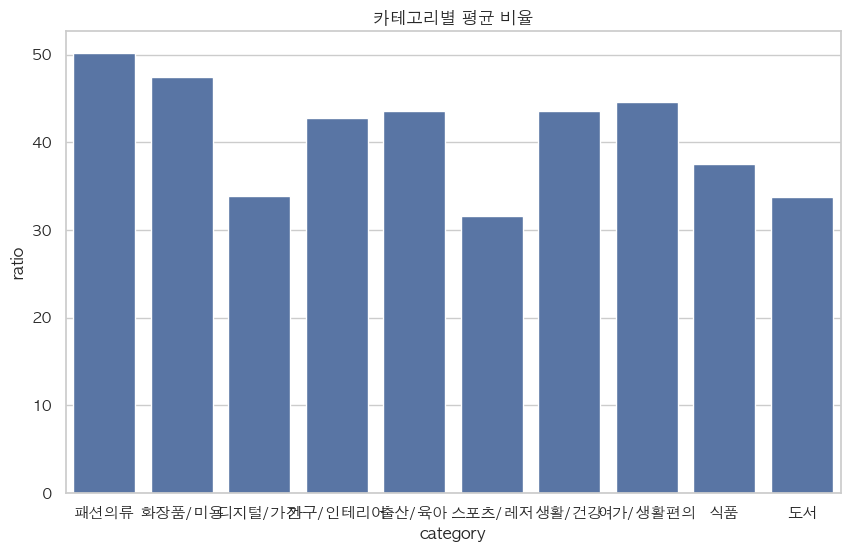

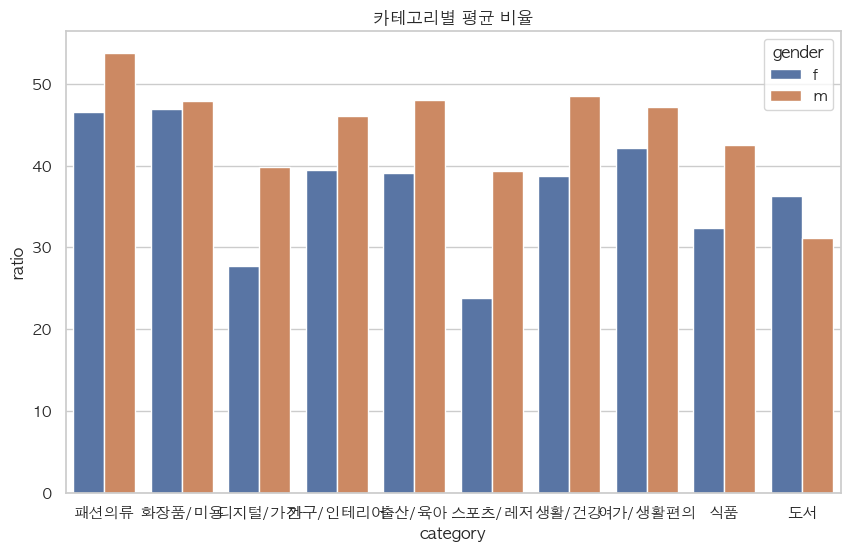

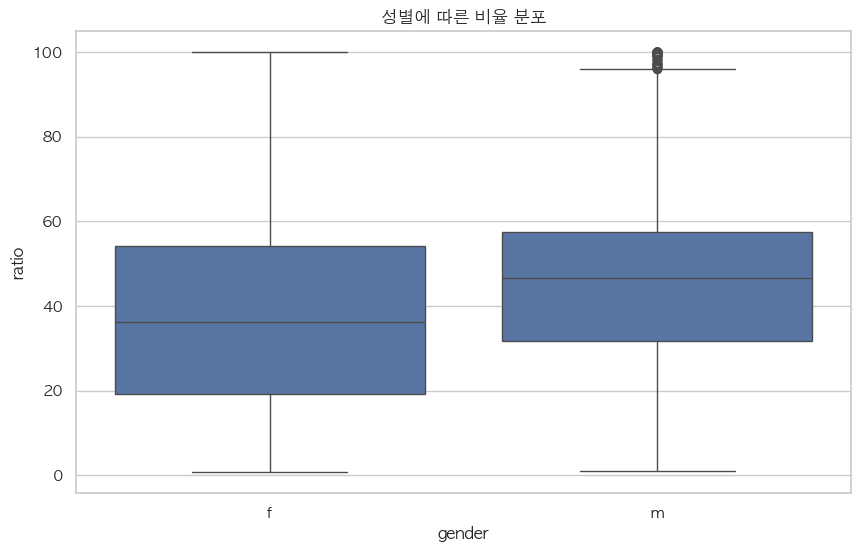

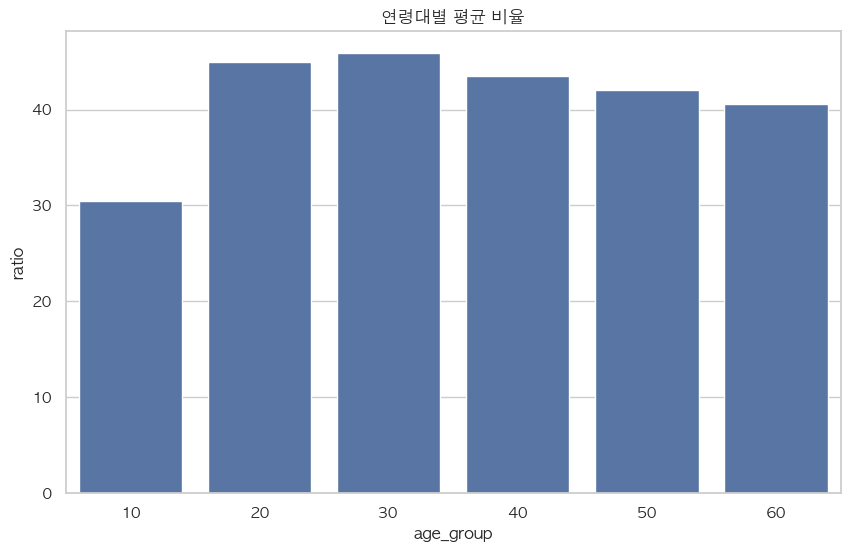

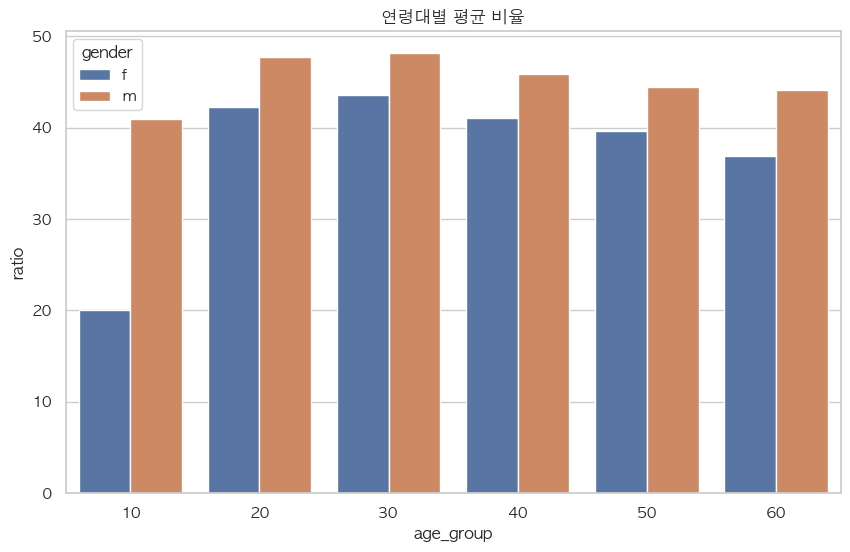

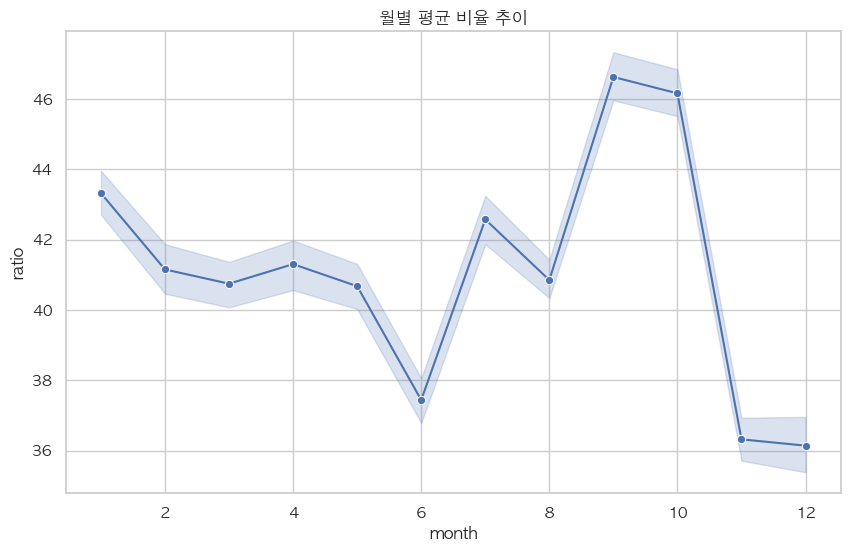

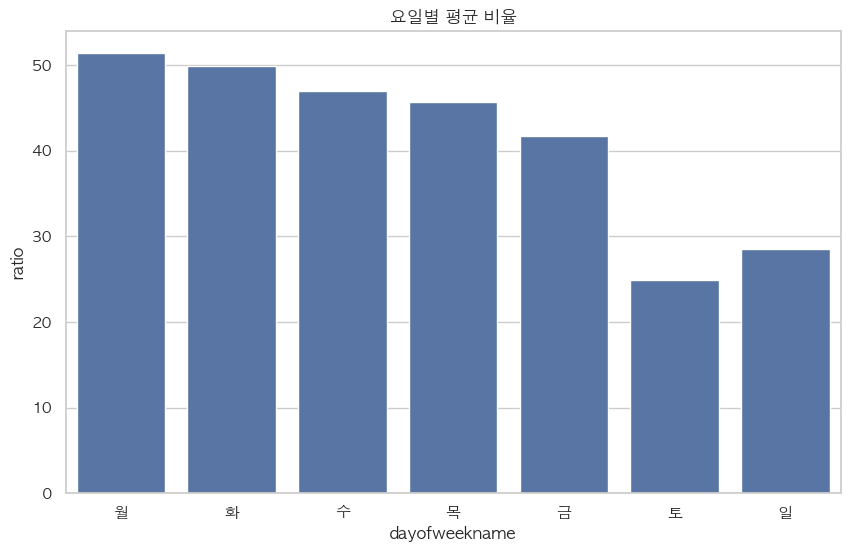

In [114]:
# 카테고리별 평균 비율 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='ratio', data=df, errorbar=None)
plt.title('카테고리별 평균 비율')

plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='ratio', data=df, errorbar=None, hue='gender')
plt.title('카테고리별 평균 비율')

# 성별에 따른 비율 분포 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='ratio', data=df)
plt.title('성별에 따른 비율 분포')

# 연령대별 평균 비율 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='ratio', data=df, errorbar=None)
plt.title('연령대별 평균 비율')

plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='ratio', data=df, errorbar=None, hue='gender')
plt.title('연령대별 평균 비율')

# 월별 평균 비율 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='ratio', data=df, marker='o')
plt.title('월별 평균 비율 추이')

# 요일별 평균 비율 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='dayofweekname', y='ratio', data=df, errorbar=None,
            order=list('월화수목금토일'))
plt.title('요일별 평균 비율')


2024-12-21 17:35:44,097 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-21 17:35:44,120 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, '카테고리별 평균 비율')

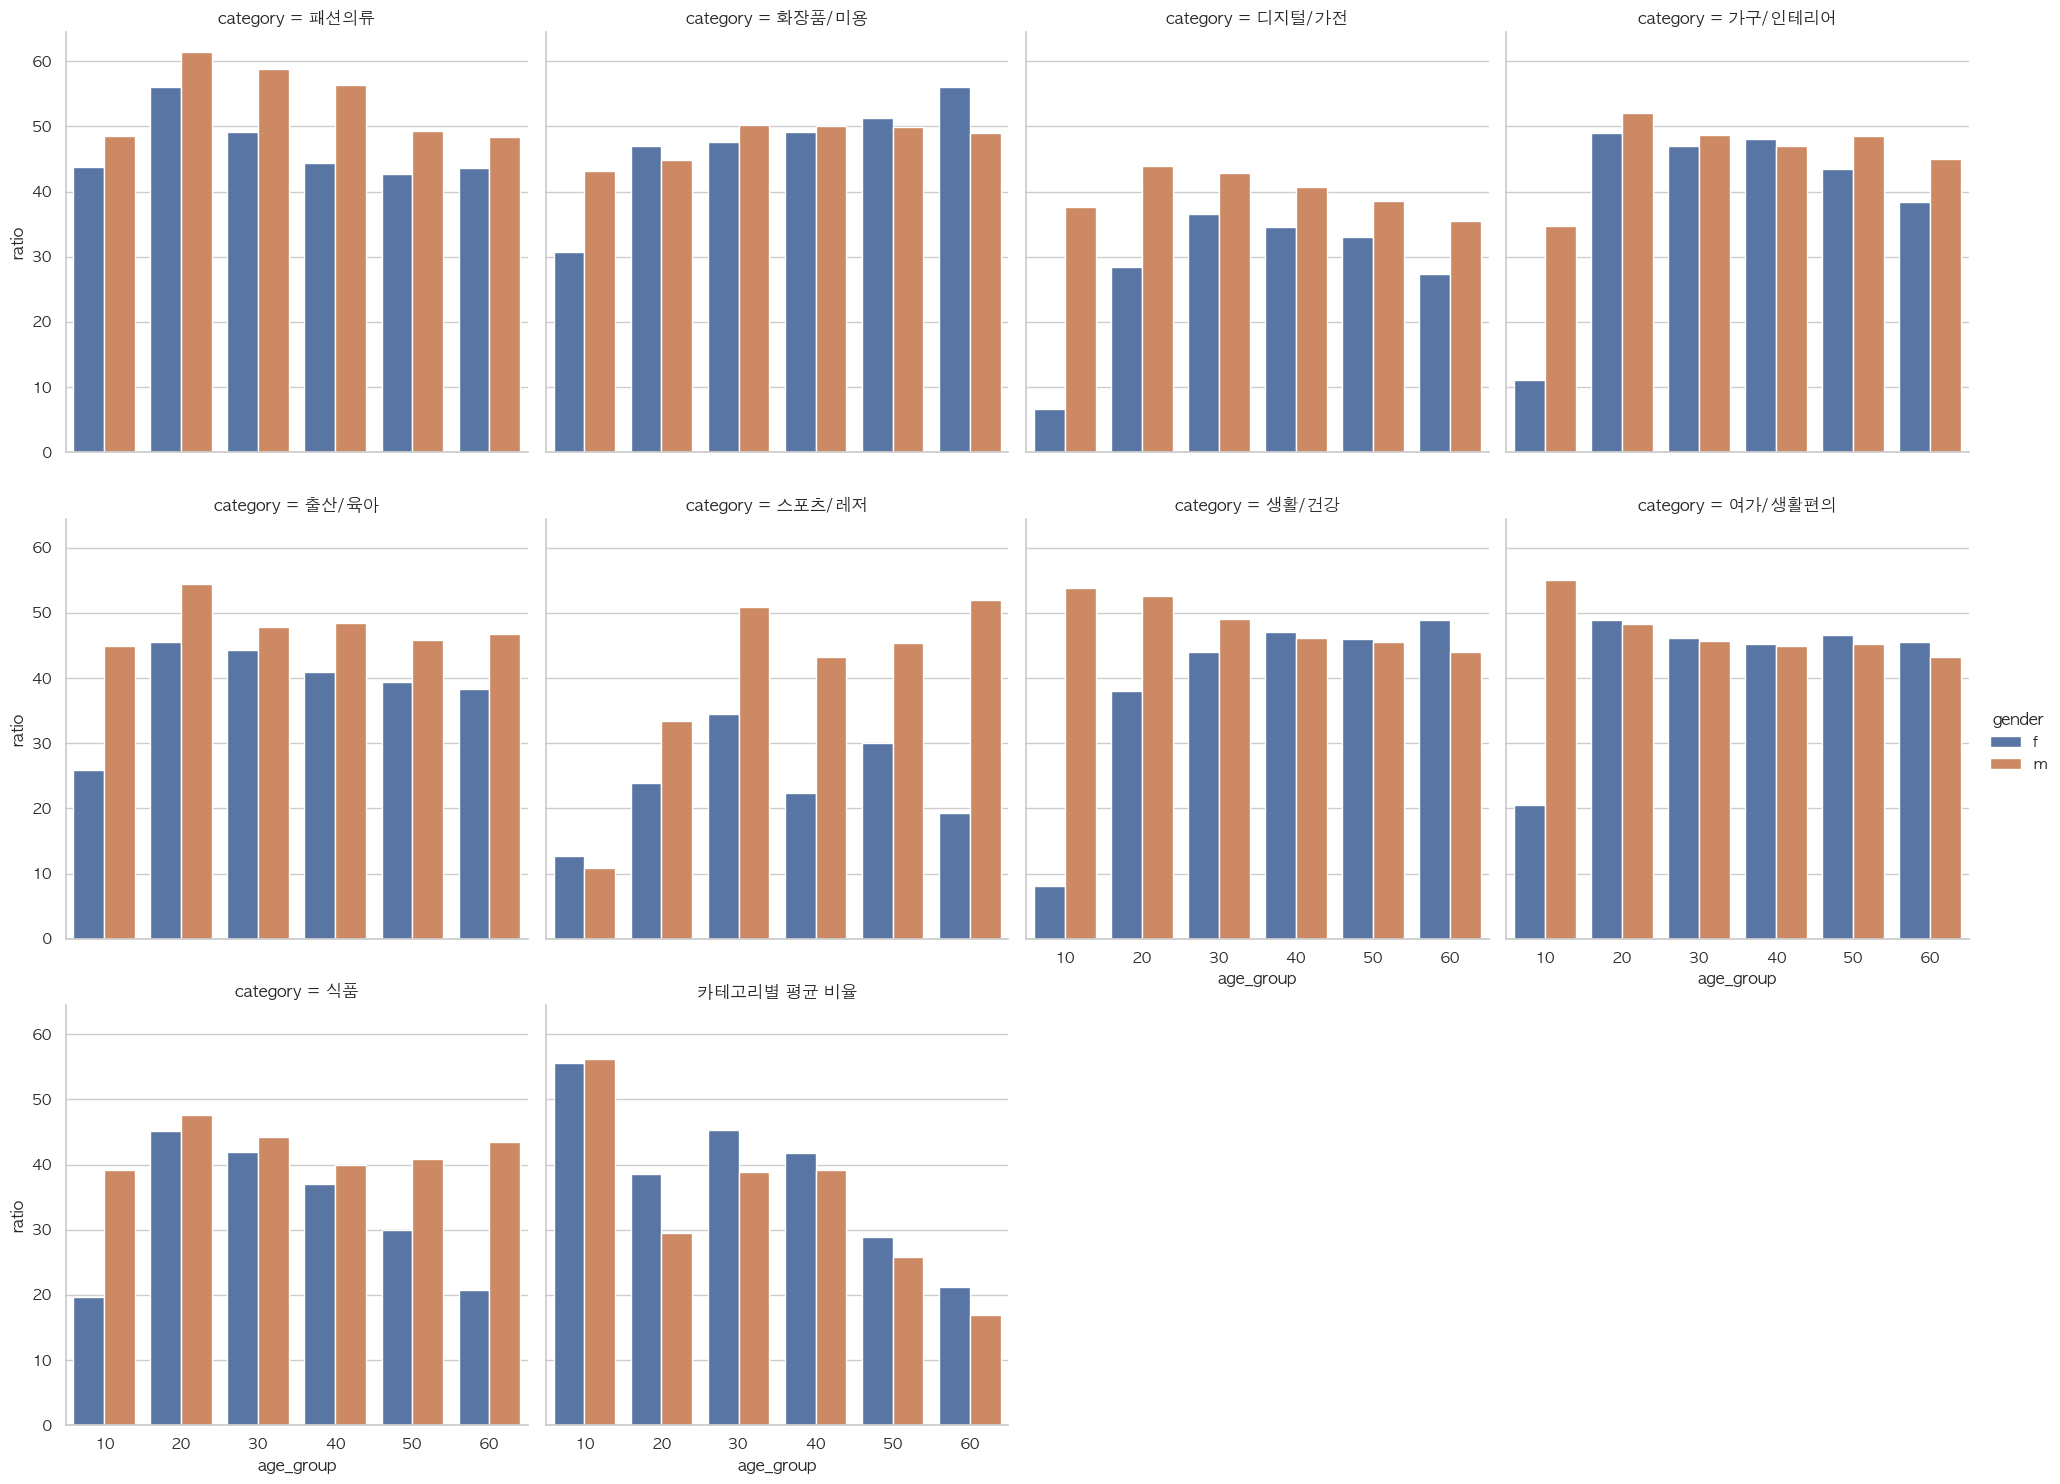

In [115]:
sns.catplot(x='age_group', y='ratio', data=df, errorbar=None, 
            kind='bar', hue='gender', col='category', col_wrap=4)
plt.title('카테고리별 평균 비율')

### 여기서부터 패션/의류 트렌드 분석

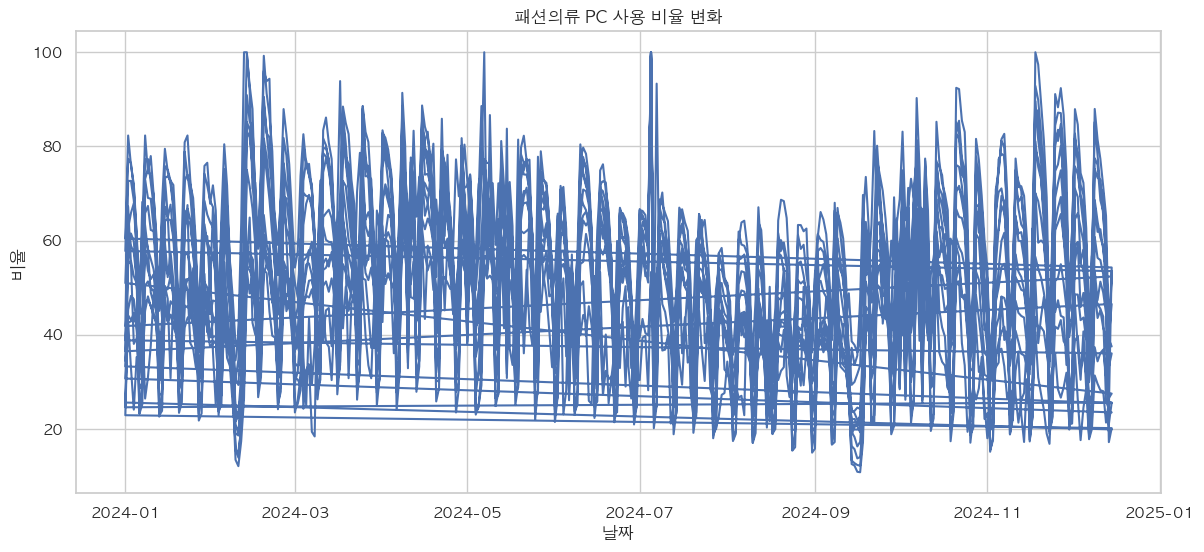

In [131]:
df['date'] = pd.to_datetime(df['date'])

# 날짜별 비율 변화 (예시: 패션의류의 PC 사용 비율)
fashion_pc_df = df[(df['category'] == '패션의류') & (df['device'] == 'pc')]
fashion_pc_df.set_index('date', inplace=True)

plt.figure(figsize=(14, 6))
plt.plot(fashion_pc_df['ratio'])
plt.title('패션의류 PC 사용 비율 변화')
plt.xlabel('날짜')
plt.ylabel('비율')
plt.grid(True)
plt.show()


In [21]:
import requests
import json

CLIENT_ID = os.getenv("CLIENT_ID")
CLIENT_SECRET = os.getenv("CLIENT_SECRET")

# 네이버 API 자격 증명 정보
CLIENT_ID = "uD_1kctG8tlAmJx1XoRX"
CLIENT_SECRET = "4PZh2CBqA1"

# API URL 및 요청 헤더 설정
url = "https://openapi.naver.com/v1/datalab/shopping/categories"
headers = {
    "X-Naver-Client-Id": CLIENT_ID,
    "X-Naver-Client-Secret": CLIENT_SECRET,
    "Content-Type": "application/json"
}

# 요청 데이터 설정
data = {
    "startDate": "2023-01-01",
    "endDate": "2023-12-31",
    "timeUnit": "month",
    "category": [{"name": "여성패션", "param": ["50000000"]}],
    "device": "",
    "ages": ["10","20", "30", "40", "50", "60"],
    "gender": ""
}

# API 요청 보내기
response = requests.post(url, headers=headers, data=json.dumps(data))

# 응답받은 데이터 출력
if response.status_code == 200:
    data = response.json()
    print(json.dumps(data, indent=4, ensure_ascii=False))
else:
    print("Error Code:", response.status_code)


{
    "startDate": "2023-01-01",
    "endDate": "2023-12-31",
    "timeUnit": "month",
    "results": [
        {
            "title": "여성패션",
            "category": [
                "50000000"
            ],
            "data": [
                {
                    "period": "2023-01-01",
                    "ratio": 83.47239
                },
                {
                    "period": "2023-02-01",
                    "ratio": 82.63156
                },
                {
                    "period": "2023-03-01",
                    "ratio": 97.9777
                },
                {
                    "period": "2023-04-01",
                    "ratio": 88.12811
                },
                {
                    "period": "2023-05-01",
                    "ratio": 87.3813
                },
                {
                    "period": "2023-06-01",
                    "ratio": 78.15542
                },
                {
                    "period": "2023-0

      period     ratio
0 2023-01-01  83.47239
1 2023-02-01  82.63156
2 2023-03-01  97.97770
3 2023-04-01  88.12811
4 2023-05-01  87.38130


/var/folders/bb/jssfksls6ll74g67j0t2j8q40000gn/T/ipykernel_5554/89147135.py:25: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/bb/jssfksls6ll74g67j0t2j8q40000gn/T/ipykernel_5554/89147135.py:25: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/bb/jssfksls6ll74g67j0t2j8q40000gn/T/ipykernel_5554/89147135.py:25: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/bb/jssfksls6ll74g67j0t2j8q40000gn/T/ipykernel_5554/89147135.py:25: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/bb/jssfksls6ll74g67j0t2j8q40000gn/T/ipykernel_5554/89147135.py:25: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/bb/jssfksls6ll74g67j0t2j8q40000gn/T/ipykernel_5554/89147135.py:25: UserWarning: Glyph 48

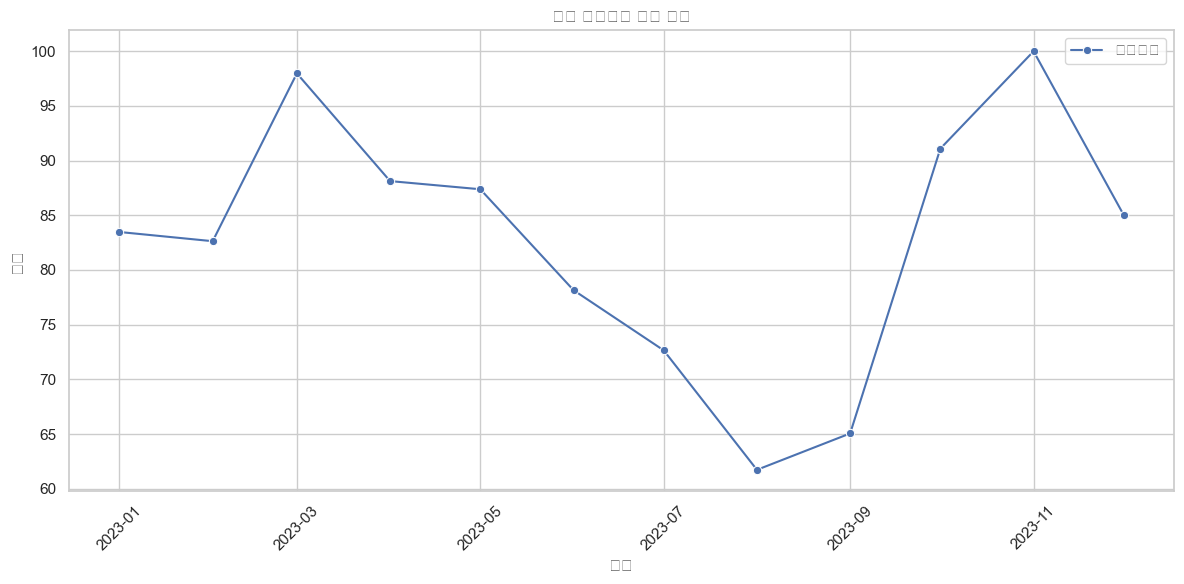

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 이전에 받았던 JSON 데이터를 Pandas 데이터프레임으로 변환
results = data['results'][0]
df = pd.DataFrame(results['data'])

# 'period' 열을 datetime 형식으로 변환
df['period'] = pd.to_datetime(df['period'])

# 데이터프레임 확인 (상위 5개 데이터)
print(df.head())

# 시각화 설정
sns.set(style="whitegrid")

# 검색 비율 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='period', y='ratio', marker='o', label='여성패션')
plt.title('월별 여성패션 검색 비율')
plt.xlabel('기간')
plt.ylabel('비율')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()


In [48]:
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
import time
import pandas as pd
import mysql.connector
from sqlalchemy import create_engine
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys


In [49]:
month_list = []
for i in range(1, 13):
    month = str(i).zfill(2)  # 숫자를 2자리로 만들기 위해 zfill 함수 사용
    month_list.append(month)

print(month_list)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']


In [53]:
chrome_options = webdriver.ChromeOptions()
service=Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

2024-12-21 16:47:02,690 - INFO - ====== WebDriver manager ======
2024-12-21 16:47:07,353 - INFO - Get LATEST chromedriver version for google-chrome
2024-12-21 16:47:07,434 - INFO - Get LATEST chromedriver version for google-chrome
2024-12-21 16:47:07,453 - INFO - There is no [mac64] chromedriver "131.0.6778.204" for browser google-chrome "131.0.6778" in cache
2024-12-21 16:47:07,453 - INFO - Get LATEST chromedriver version for google-chrome
2024-12-21 16:47:07,619 - INFO - WebDriver version 131.0.6778.204 selected
2024-12-21 16:47:07,621 - INFO - Modern chrome version https://storage.googleapis.com/chrome-for-testing-public/131.0.6778.204/mac-arm64/chromedriver-mac-arm64.zip
2024-12-21 16:47:07,621 - INFO - About to download new driver from https://storage.googleapis.com/chrome-for-testing-public/131.0.6778.204/mac-arm64/chromedriver-mac-arm64.zip
2024-12-21 16:47:07,730 - INFO - Driver downloading response is 200
2024-12-21 16:47:08,681 - INFO - Get LATEST chromedriver version for goo

In [56]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager

# === 1. ChromeDriver 설정 === #
def setup_driver():
    chrome_options = Options()
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    chrome_options.add_argument('--headless')  # 필요 시 브라우저 숨기기
    chrome_options.add_argument('--start-maximized')
    service = Service(ChromeDriverManager().install())  # webdriver_manager 라이브러리 활용
    driver = webdriver.Chrome(service=service, options=chrome_options)
    return driver


# === 2. 네이버 데이터랩 크롤링 === #
def crawl_datalab():
    driver = setup_driver()
    try:
        # 네이버 데이터랩 접속
        print("네이버 데이터랩 접속 중...")
        driver.get("https://datalab.naver.com/shoppingInsight/sCategory.naver")
        time.sleep(2)

        # 기기, 성별, 연령 설정
        print("기기 전체, 성별 전체, 연령 전체 선택 중...")
        driver.find_element(By.XPATH, '//*[@id="18_device_0"]').click()  # 기기 전체
        driver.find_element(By.XPATH, '//*[@id="19_gender_0"]').click()  # 성별 전체
        driver.find_element(By.XPATH, '//*[@id="20_age_0"]').click()     # 연령 전체
        time.sleep(1)

        # 조회 버튼 클릭
        print("조회하기 버튼 클릭 중...")
        submit_button = driver.find_element(By.XPATH, '//*[@id="content"]/div[2]/div/div[1]/div/a')
        submit_button.click()
        time.sleep(2)

        # 데이터 크롤링 시작
        print("데이터 크롤링 시작...")
        rows = []  # 데이터를 저장할 리스트

        # 총 25페이지 크롤링
        for page in range(25):  # range(0, 25): 25 페이지
            print(f"{page + 1} 페이지 크롤링 중...")

            for item in range(1, 21):  # 한 페이지당 20개 아이템
                xpath = f'//*[@id="content"]/div[2]/div/div[2]/div[2]/div/div/div[1]/ul/li[{item}]/a'
                try:
                    result = driver.find_element(By.XPATH, xpath).text.split('\n')  # 순위, 키워드 데이터 추출
                    rank, keyword = result[0], result[1]
                    rows.append([rank, keyword])  # 데이터를 리스트에 저장
                except Exception as e:
                    print(f"Error on page {page + 1}, item {item}: {e}")
                time.sleep(0.1)  # 약간의 대기 시간

            # 다음 페이지 버튼 클릭
            try:
                next_button = driver.find_element(By.XPATH, '//*[@id="content"]/div[2]/div/div[2]/div[2]/div/div/div[2]/div/a[2]')
                next_button.click()
                time.sleep(2)
            except Exception as e:
                print(f"다음 페이지 버튼을 찾을 수 없습니다 (종료): {e}")
                break

        # DataFrame 생성 및 CSV 저장
        df = pd.DataFrame(rows, columns=["Rank", "Keyword"])
        df.to_csv("naverkeyword_top500.csv", index=False, encoding="utf-8-sig")  # UTF-8-SIG로 저장
        print("데이터 저장 완료: naverkeyword_top500.csv")

    finally:
        driver.quit()
        print("드라이버 종료")


# === 3. 실행 === #
if __name__ == "__main__":
    crawl_datalab()


2024-12-21 17:00:07,184 - INFO - ====== WebDriver manager ======
2024-12-21 17:00:07,377 - INFO - Get LATEST chromedriver version for google-chrome
2024-12-21 17:00:07,399 - INFO - Get LATEST chromedriver version for google-chrome
2024-12-21 17:00:07,419 - INFO - Driver [/Users/sohee/.wdm/drivers/chromedriver/mac64/131.0.6778.204/chromedriver-mac-arm64/chromedriver] found in cache


네이버 데이터랩 접속 중...
기기 전체, 성별 전체, 연령 전체 선택 중...
조회하기 버튼 클릭 중...
데이터 크롤링 시작...
1 페이지 크롤링 중...
2 페이지 크롤링 중...
3 페이지 크롤링 중...
4 페이지 크롤링 중...
5 페이지 크롤링 중...
6 페이지 크롤링 중...
7 페이지 크롤링 중...
8 페이지 크롤링 중...
9 페이지 크롤링 중...
10 페이지 크롤링 중...
11 페이지 크롤링 중...
12 페이지 크롤링 중...
13 페이지 크롤링 중...
14 페이지 크롤링 중...
15 페이지 크롤링 중...
16 페이지 크롤링 중...
17 페이지 크롤링 중...
18 페이지 크롤링 중...
19 페이지 크롤링 중...
20 페이지 크롤링 중...
21 페이지 크롤링 중...
22 페이지 크롤링 중...
23 페이지 크롤링 중...
24 페이지 크롤링 중...
25 페이지 크롤링 중...
데이터 저장 완료: naverkeyword_top500.csv
드라이버 종료


In [117]:
df2 = pd.read_csv('naverkeyword_top500.csv')
df2

,Rank,Keyword
0,1,여성패딩
1,2,여성롱패딩
2,3,몽클레어패딩
3,4,롱패딩
4,5,패딩
...,...,...
495,496,조이너스패딩
496,497,네셔널패딩
497,498,캐나다구스패딩
498,499,심리스팬티


1.키워드 빈도 분석: 많이 언급된 키워드는 무엇인지 확인.<br>
2.키워드에 포함된 품목 분포 분석: 특정 품목(코트, 패딩 등)의 인기.<br>
3.연관 키워드 네트워크 시각화: 자주 함께 등장하는 연관 키워드 확인.<br>
4.키워드의 월별 트렌드 분석: 월별 키워드 관심도가 다른지 확인.<br>
5.구매 의향 키워드 추출: 구매 관련 키워드(예: 저렴, 추천 등)를 가진 키워드 사용 빈도 확인.<br>

### 키워드 빈도 분석

    Keyword  Rank
0    몽클레어패딩     1
1       롱패딩     2
2       숏패딩     3
3        코트     4
4       무스탕     5
5      패딩조끼     6
6     에르노패딩     7
7      여성코트     8
8        점퍼     9
9    캐시미어코트    10
10      원피스    11
11  에고이스트패딩    12
12   코듀로이팬츠    13
13    버버리패딩    14
14    온앤온패딩    15
15    여성숏패딩    16
16     경량패딩    17
17    나이키패딩    18
18    노르딕니트    19
19    니트원피스    20


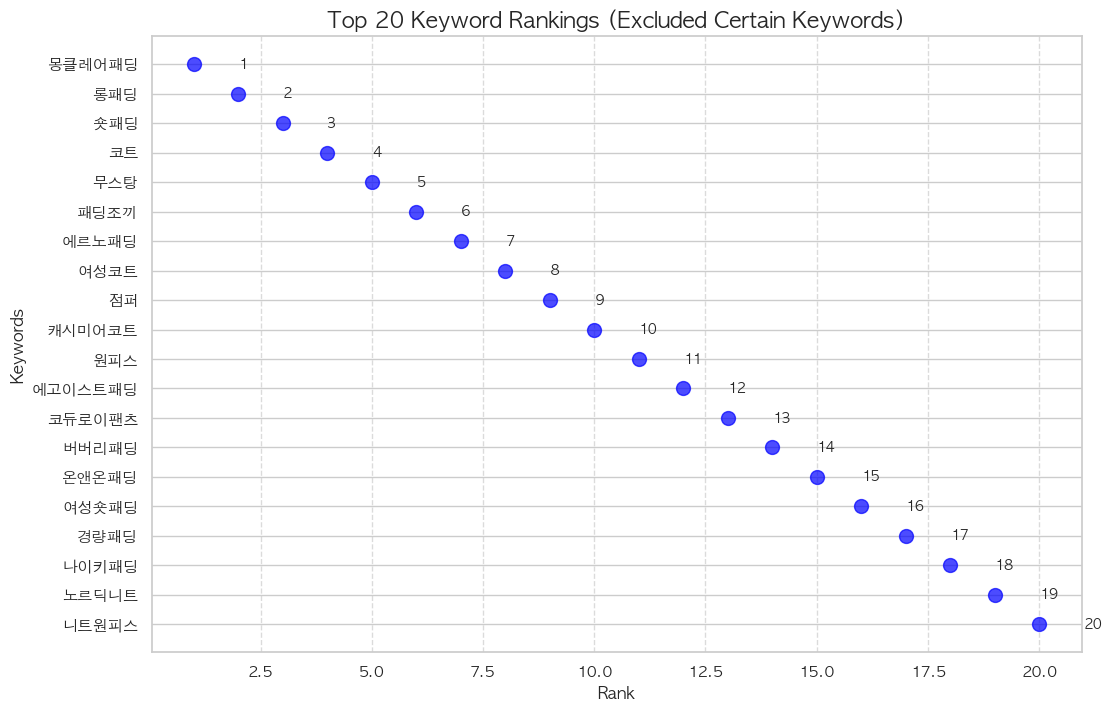

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
plt.rcParams['font.family'] = 'AppleGothic'

# 데이터 로드
df = pd.read_csv('naverkeyword_top500.csv', encoding='utf-8-sig')

# Null 값 제거 (필요 시)
df = df.dropna(subset=['Keyword'])

# 필터링할 키워드 목록 정의
exclude_keywords = ['여성패딩', '남성패딩', '패딩', '겨울패딩','여성롱패딩', '남자패딩','여자롱패딩']  # 제외할 키워드

# 제외할 키워드를 제거한 데이터
filtered_keywords = df[~df['Keyword'].isin(exclude_keywords)]

# 키워드 빈도 계산
keyword_counts = Counter(filtered_keywords['Keyword'])

# 상위 20개 키워드
most_common_keywords = keyword_counts.most_common(20)

# 데이터프레임으로 변환
most_common_df = pd.DataFrame(most_common_keywords, columns=['Keyword', 'Rank'])

# 순위 라벨링 추가
most_common_df['Rank'] = most_common_df.index + 1

# 데이터 출력 확인
print(most_common_df)

# 점 그래프 시각화
plt.figure(figsize=(12, 8))

plt.scatter(most_common_df['Rank'], most_common_df['Keyword'], color='blue', alpha=0.7, s=100)

plt.title('Top 20 Keyword Rankings (Excluded Certain Keywords)', fontsize=16)
plt.xlabel('Rank', fontsize=12)
plt.ylabel('Keywords', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 점 옆에 빈도 값 추가
for i, count in enumerate(most_common_df['Rank']):
    plt.text(count + 1, i, str(count), va='center', fontsize=10)
    
plt.gca().invert_yaxis()

plt.show()


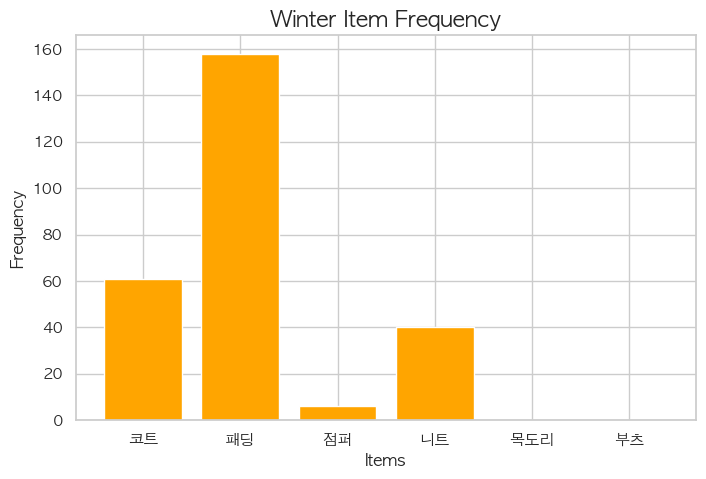

In [119]:
import re

# 주요 품목 목록
items = ['코트', '패딩', '점퍼', '니트', '목도리', '부츠']

# 품목 빈도 카운트
item_counts = {item: 0 for item in items}

for keyword in df['Keyword']:
    for item in items:
        if item in keyword:
            item_counts[item] += 1

# 데이터프레임 변환
item_df = pd.DataFrame(list(item_counts.items()), columns=['Item', 'Count'])

# 시각화
plt.figure(figsize=(8, 5))
plt.bar(item_df['Item'], item_df['Count'], color='orange')
plt.title('Winter Item Frequency', fontsize=16)
plt.xlabel('Items', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


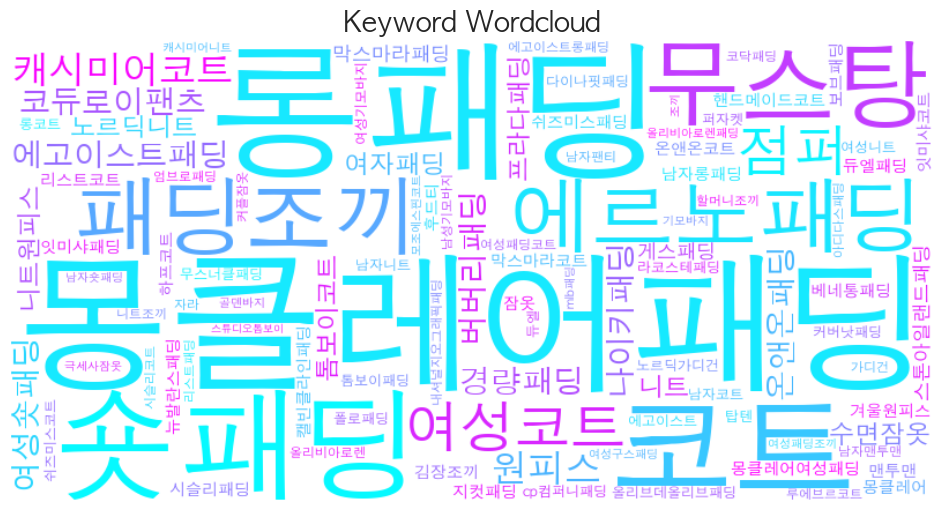

In [120]:
from wordcloud import WordCloud

# 워드클라우드 데이터 준비
wordcloud_data = {keyword: count for keyword, count in keyword_counts.items()}

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path='/System/Library/Fonts/Supplemental/AppleGothic.ttf',  # 한글 폰트 경로 (MacOS)
    width=800,
    height=400,
    max_words=100,  # 최대 표시 단어 수
    background_color='white',  # 배경색
    colormap='cool',  # 색상 맵
    random_state=42
).generate_from_frequencies(wordcloud_data)

# 워드클라우드 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 좌표 제거
plt.title('Keyword Wordcloud', fontsize=20)
plt.show()
